In [53]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
palette = sns.color_palette("Spectral", n_colors=5) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('./marketing_campaign.csv',sep='\t')

# 数据查看

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

| **类别**     | **字段名**              | **字段描述**                                               |
|--------------|-------------------------|------------------------------------------------------------|
| **客户信息** | ID                       | 客户的唯一标识符                                           |
|              | Year_Birth               | 客户的出生年份                                             |
|              | Education                | 客户的教育水平                                             |
|              | Marital_Status           | 客户的婚姻状况                                             |
|              | Income                   | 客户的年度家庭收入                                         |
|              | Kidhome                  | 客户家庭中孩子的数量                                       |
|              | Teenhome                 | 客户家庭中青少年的数量                                     |
|              | Dt_Customer              | 客户与公司注册的日期                                       |
|              | Recency                  | 自客户最后一次购买以来的天数                               |
|              | Complain                 | 客户在过去2年内是否投诉，1为投诉，0为未投诉                |
| **产品消费** | MntWines                 | 过去2年中在葡萄酒上的消费金额                              |
|              | MntFruits                | 过去2年中在水果上的消费金额                                |
|              | MntMeatProducts          | 过去2年中在肉类产品上的消费金额                            |
|              | MntFishProducts          | 过去2年中在鱼类产品上的消费金额                            |
|              | MntSweetProducts         | 过去2年中在甜食上的消费金额                                |
|              | MntGoldProds             | 过去2年中在黄金产品上的消费金额                            |
| **促销活动** | NumDealsPurchases        | 使用折扣购买的次数                                         |
|              | AcceptedCmp1             | 客户是否接受了第一次营销活动的优惠，1为接受，0为未接受     |
|              | AcceptedCmp2             | 客户是否接受了第二次营销活动的优惠，1为接受，0为未接受     |
|              | AcceptedCmp3             | 客户是否接受了第三次营销活动的优惠，1为接受，0为未接受     |
|              | AcceptedCmp4             | 客户是否接受了第四次营销活动的优惠，1为接受，0为未接受     |
|              | AcceptedCmp5             | 客户是否接受了第五次营销活动的优惠，1为接受，0为未接受     |
|              | Response                 | 客户是否接受了最后一次营销活动的优惠，1为接受，0为未接受   |
| **购物场所** | NumWebPurchases          | 通过公司网站购买的次数                                     |
|              | NumCatalogPurchases      | 使用目录购买的次数                                         |
|              | NumStorePurchases        | 直接在店内购买的次数                                       |
|              | NumWebVisitsMonth        | 客户在过去一个月访问公司网站的次数                         |

In [5]:
df.shape[1]

29

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
missing_ids=df[df['Income'].isna()]['ID']

In [10]:
matching_rows = df[df['ID'].isin(missing_ids) & df['Income'].notna()]

In [11]:
print(matching_rows)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [12]:
df.duplicated().sum()

0

**数据概述**
1. 数据集共2240行，29个字段；
2. 数据集仅在Income字段有24个缺失值；
3. 没有重复数据；
4. 大部分字段是数值型，Marital_Status、Education、Dt_customer三个字段需要转换类型，Z_Revenue和Z_CostContact不在数据集说明中。

# 数据预处理

In [13]:
df['Z_CostContact'].nunique()

1

In [14]:
df['Z_Revenue'].nunique()

1

In [15]:
df['ID'].nunique()

2240

In [16]:
# 删除三个无用的字段
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [17]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")

In [18]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [19]:
# 计算客户注册的天数
latest_date = df['Dt_Customer'].max()
df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days

In [20]:
df['Days_is_client'].head()

0    663
1    113
2    312
3    139
4    161
Name: Days_is_client, dtype: int64

In [21]:
categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [22]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Committed')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [23]:
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')  
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

In [118]:
# 合并部分字段
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [119]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Kids,TotalAcceptedCmp,Expenses,TotalNumPurchases
0,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,663,0,0,1617,25
1,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,113,2,0,27,6
2,1965,Graduate,Committed,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,312,0,0,776,21
3,1984,Graduate,Committed,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,139,1,0,53,8
4,1981,Postgraduate,Committed,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,161,1,0,422,19


In [120]:
df['Kids'] = df['Kids'].apply(lambda x: 1 if x != 0 else 0)

In [121]:
df['Kids'].head()

0    0
1    1
2    0
3    1
4    1
Name: Kids, dtype: int64

In [122]:
data = df.copy()

In [123]:
data.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Days_is_clie

In [124]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Kids,TotalAcceptedCmp,Expenses,TotalNumPurchases
0,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,663,0,0,1617,25
1,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,113,1,0,27,6
2,1965,Graduate,Committed,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,312,0,0,776,21
3,1984,Graduate,Committed,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,139,1,0,53,8
4,1981,Postgraduate,Committed,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,161,1,0,422,19


In [125]:
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)

In [126]:
print(data.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Days_is_client', 'Kids', 'TotalAcceptedCmp',
       'Expenses', 'TotalNumPurchases'],
      dtype='object')


In [127]:
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [128]:
print(data.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Days_is_client', 'Kids', 'TotalAcceptedCmp', 'Expenses',
       'TotalNumPurchases'],
      dtype='object')


In [129]:
data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [130]:
print(data.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Days_is_client', 'Kids', 'TotalAcceptedCmp',
       'Expenses', 'TotalNumPurchases'],
      dtype='object')


In [131]:
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [132]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Recency                 0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
Days_is_client          0
Kids                    0
TotalAcceptedCmp        0
Expenses                0
TotalNumPurchases       0
dtype: int64

In [133]:
data=data.dropna()

In [134]:
data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Days_is_client         0
Kids                   0
TotalAcceptedCmp       0
Expenses               0
TotalNumPurchases      0
dtype: int64

In [135]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [136]:
X_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

# K均值聚类

In [137]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(2216, 18)

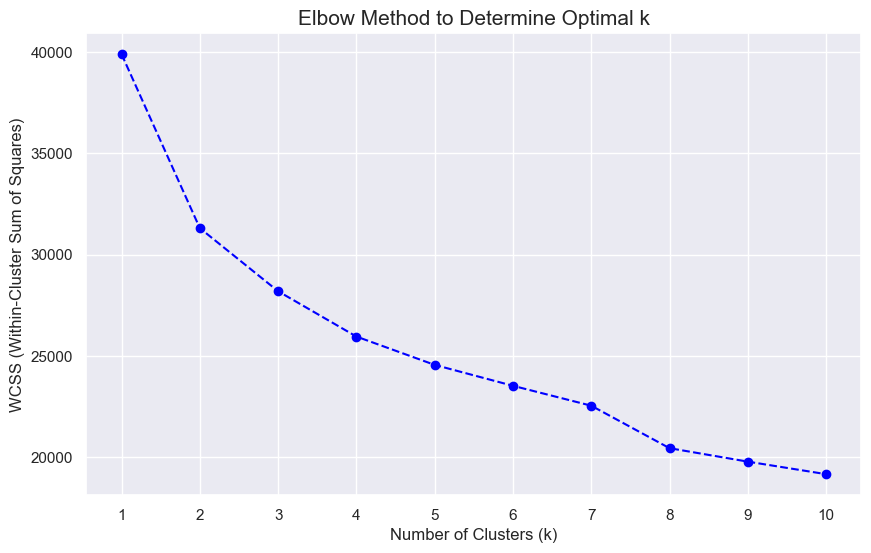

In [138]:
wcss = []
k_values = range(1, 11)

# 运行 KMeans 对不同簇数 k 进行聚类，并计算 WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ 是 WCSS

# 绘制 k 对应的 WCSS 曲线
plt.figure(figsize=(10,6))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal k', fontsize=15)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [139]:
range_n_clusters = np.arange(2,10,1)

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init=10, random_state=100)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.21803875254779953
For n_clusters=3, the silhouette score is 0.1832565308301429
For n_clusters=4, the silhouette score is 0.20300127200029755
For n_clusters=5, the silhouette score is 0.1754150107099426
For n_clusters=6, the silhouette score is 0.1254348524003831
For n_clusters=7, the silhouette score is 0.20851611068428544
For n_clusters=8, the silhouette score is 0.1346113700018888
For n_clusters=9, the silhouette score is 0.14439778103213816


In [140]:
kmeans = KMeans(n_clusters=2, max_iter=50, n_init=10)

kmeans.fit(X_scaled)

y_kmeans = kmeans.fit_predict(X_scaled)

X_transformed = scaler.inverse_transform(X_scaled)

In [160]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

,Year_Birth,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days_is_client,Kids,TotalAcceptedCmp,Expenses,TotalNumPurchases,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,1957.0,58138.0,58.0,3.0,8.0,10.0,4.0,7.0,0.0,1.0,663.0,0.0,0.0,1617.0,25.0,0.0,0.0,1.0
1,1954.0,46344.0,38.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,113.0,1.0,0.0,27.0,6.0,0.0,0.0,1.0
2,1965.0,71613.0,26.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,312.0,0.0,0.0,776.0,21.0,0.0,0.0,0.0
3,1984.0,26646.0,26.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,139.0,1.0,0.0,53.0,8.0,0.0,0.0,0.0
4,1981.0,58293.0,94.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,161.0,1.0,0.0,422.0,19.0,1.0,0.0,0.0


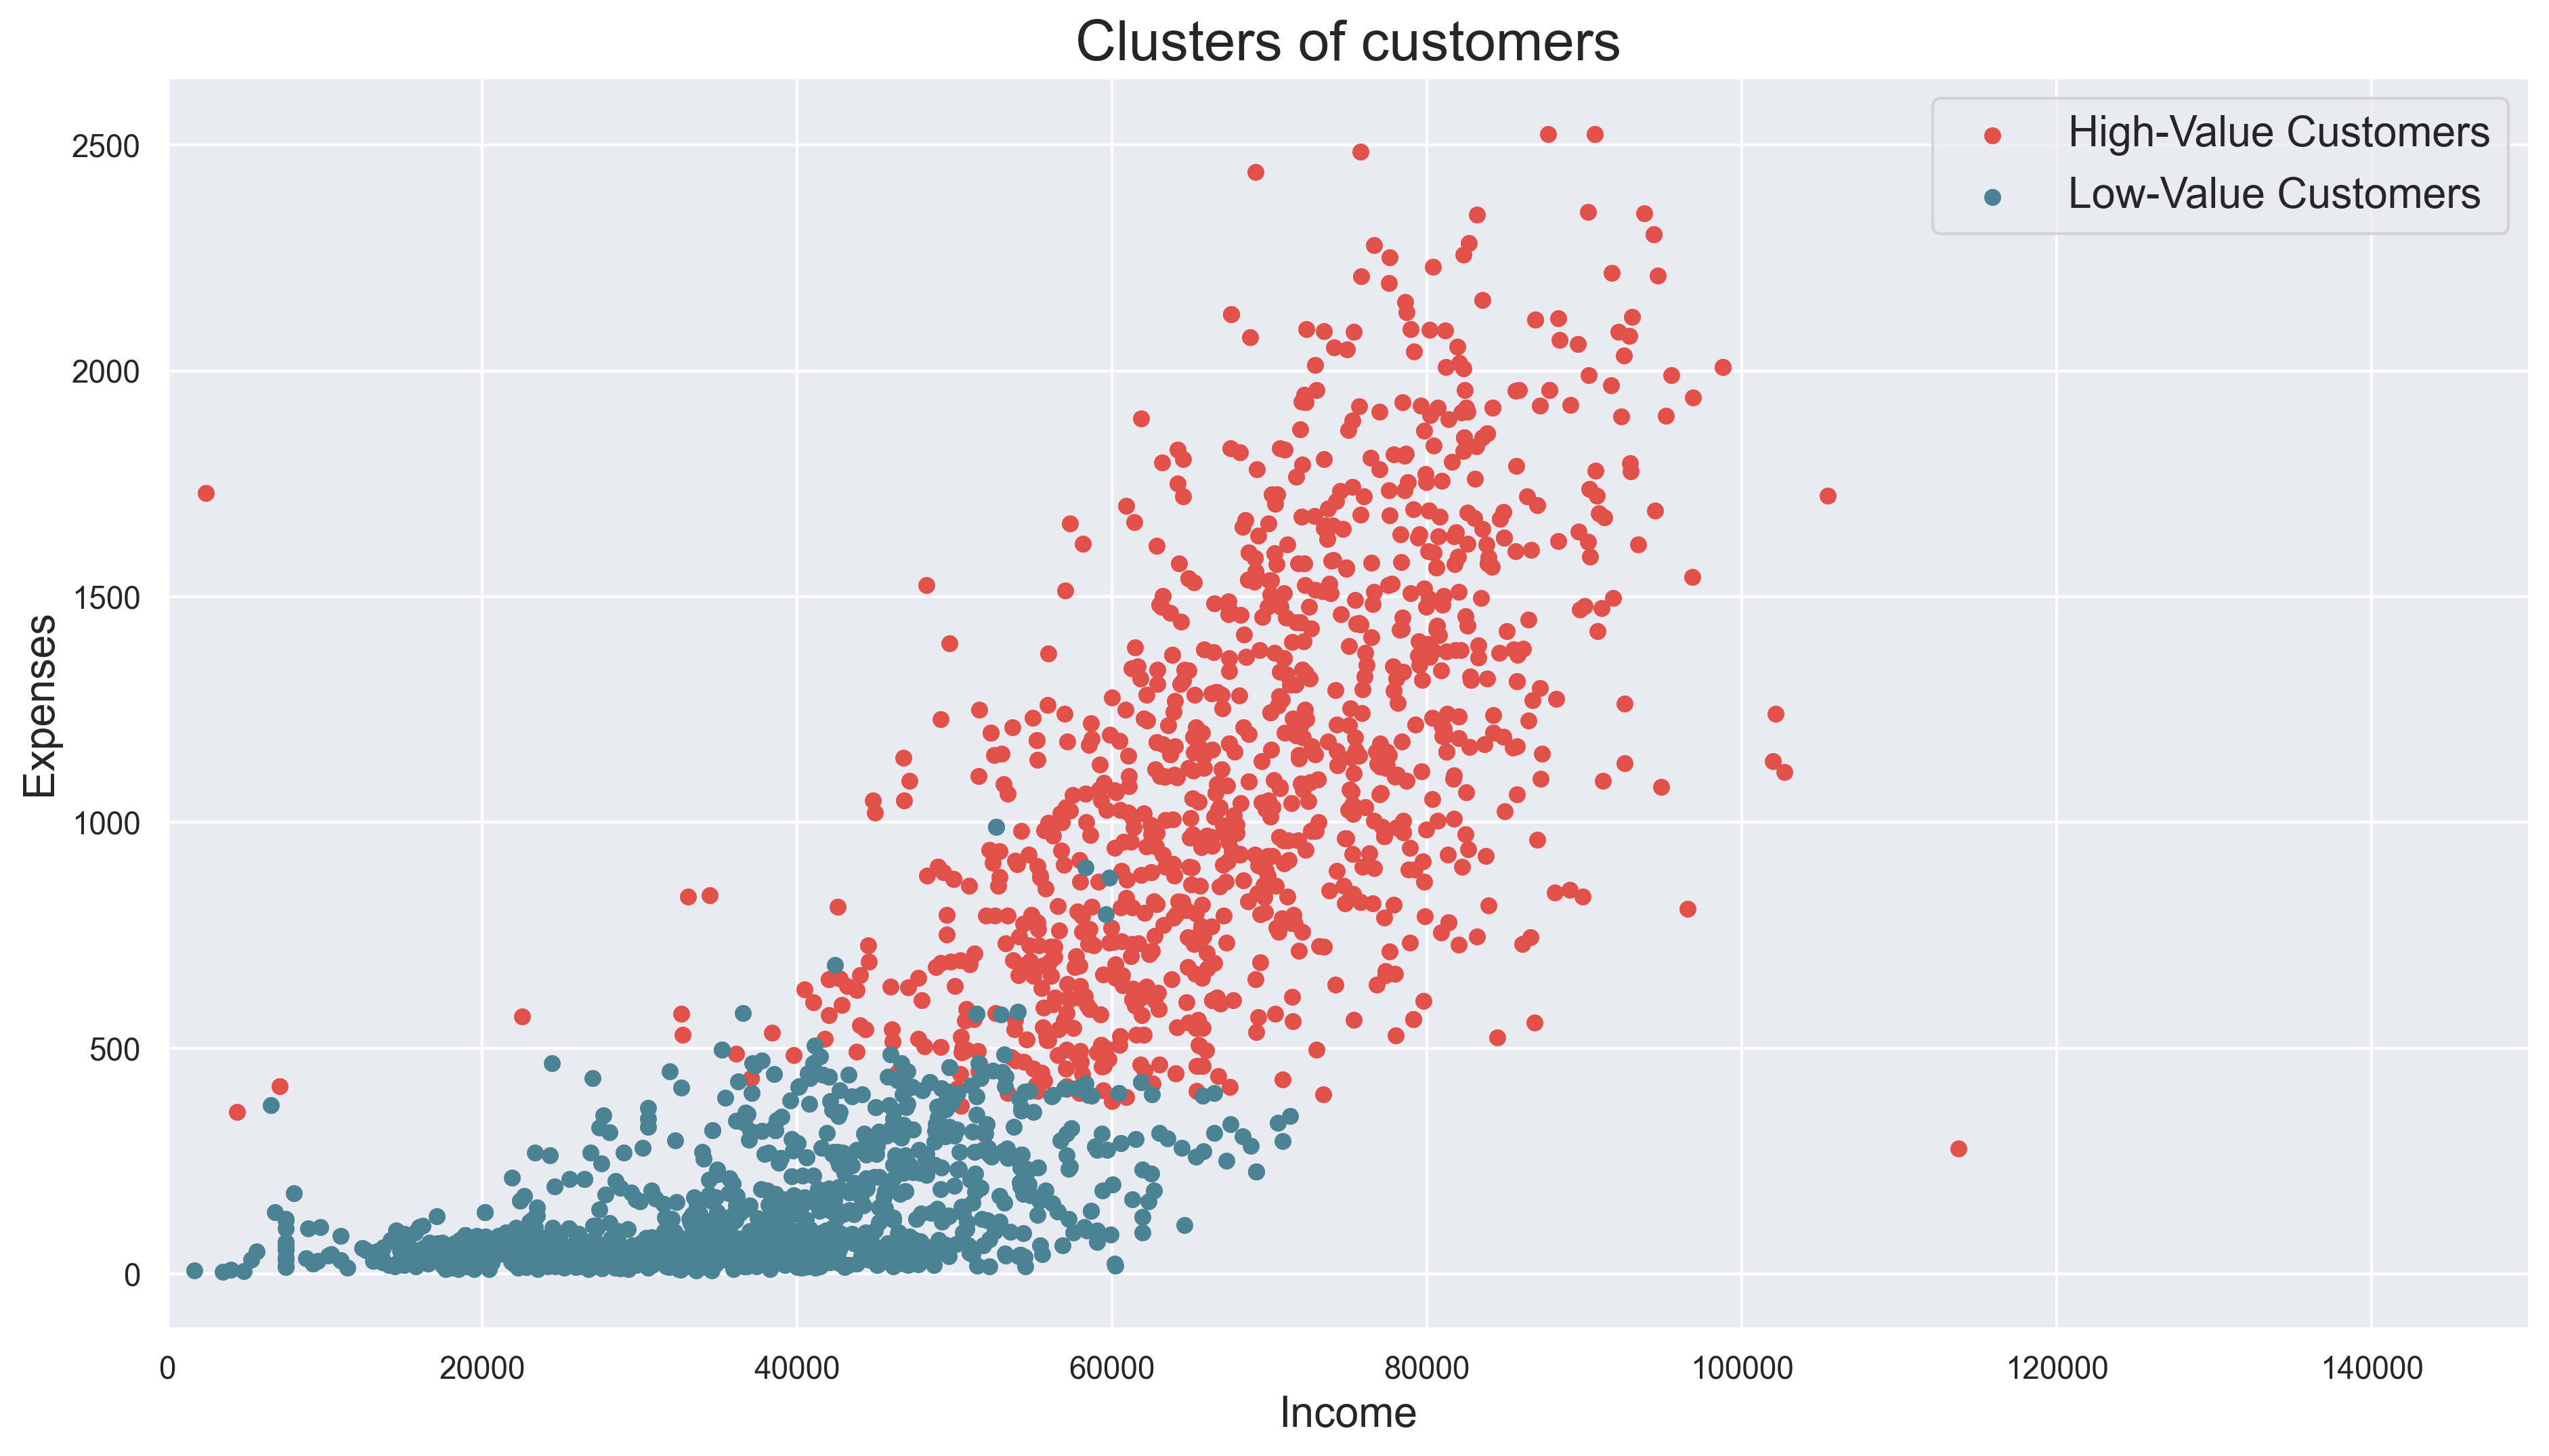

In [142]:
plt.figure(figsize= (15,8), dpi=300)

plt.scatter(X_transformed[y_kmeans == 1, 1], X_transformed[y_kmeans == 1, 13], s = 25, c = '#E2504A', label = 'High-Value Customers')
plt.scatter(X_transformed[y_kmeans == 0, 1], X_transformed[y_kmeans == 0, 13], s = 25, c = '#498394', label = 'Low-Value Customers')
plt.xlim(0, 150000)

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

In [158]:
df_clusters = pd.DataFrame(X_transformed, columns=X_encoded.columns)
# 将簇标签添加到新列 'Cluster'
df_clusters = data.copy()
df_clusters['Cluster'] = y_kmeans

In [159]:
df_clusters.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days_is_client,Kids,TotalAcceptedCmp,Expenses,TotalNumPurchases,Cluster
0,1957,Graduate,Single,58138.0,58,3,8,10,4,7,0,1,663,0,0,1617,25,1
1,1954,Graduate,Single,46344.0,38,2,1,1,2,5,0,0,113,1,0,27,6,0
2,1965,Graduate,Committed,71613.0,26,1,8,2,10,4,0,0,312,0,0,776,21,1
3,1984,Graduate,Committed,26646.0,26,2,2,0,4,6,0,0,139,1,0,53,8,0
4,1981,Postgraduate,Committed,58293.0,94,5,5,3,6,5,0,0,161,1,0,422,19,0


# 客户画像

In [174]:
columns_to_plot = ['Year_Birth', 'NumWebPurchases', 'Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp', 'NumDealsPurchases'] 

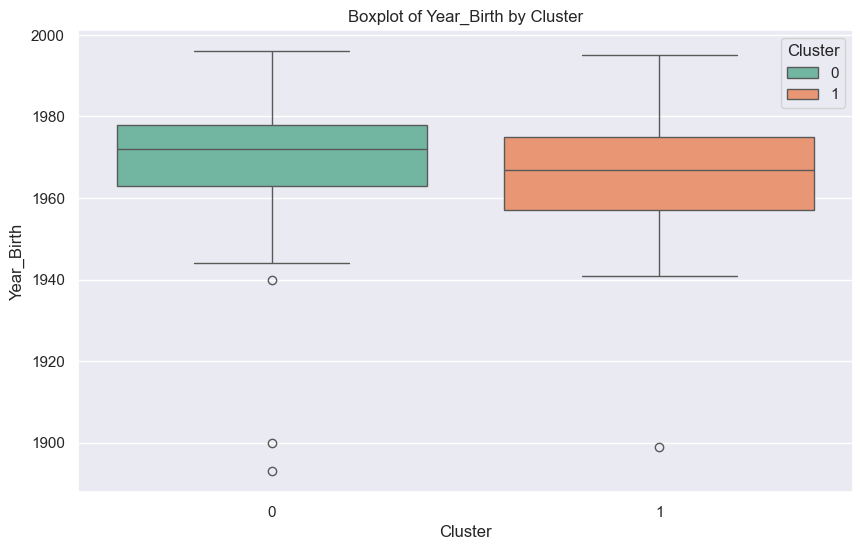

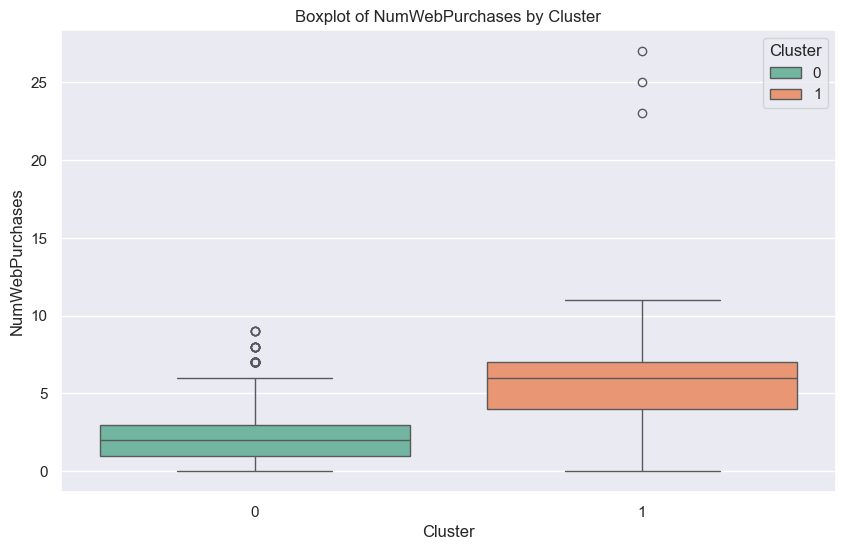

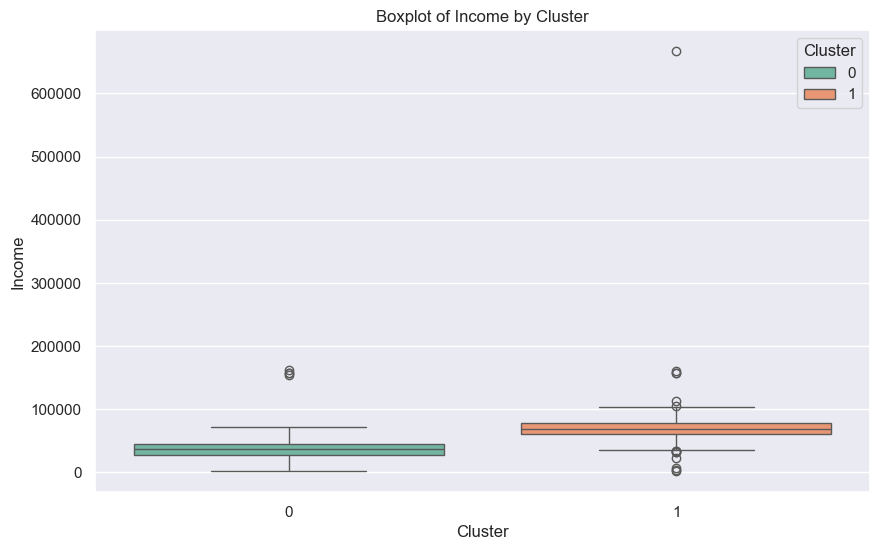

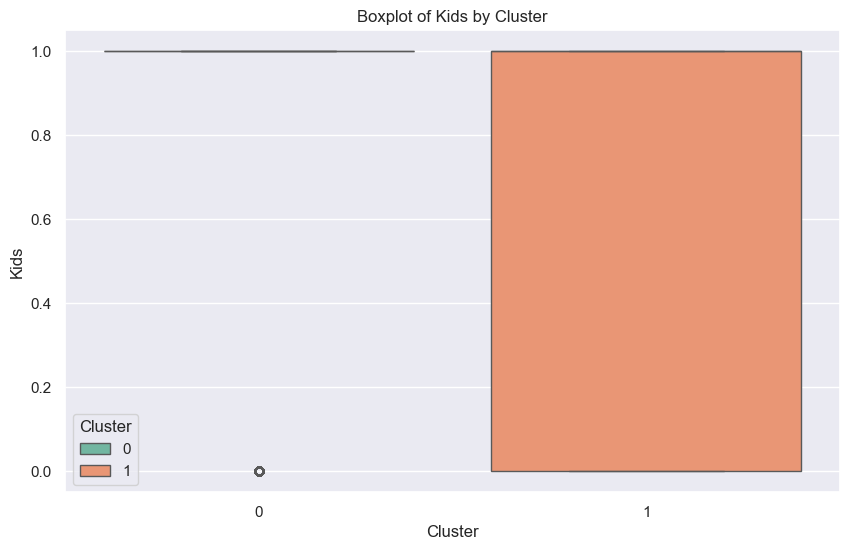

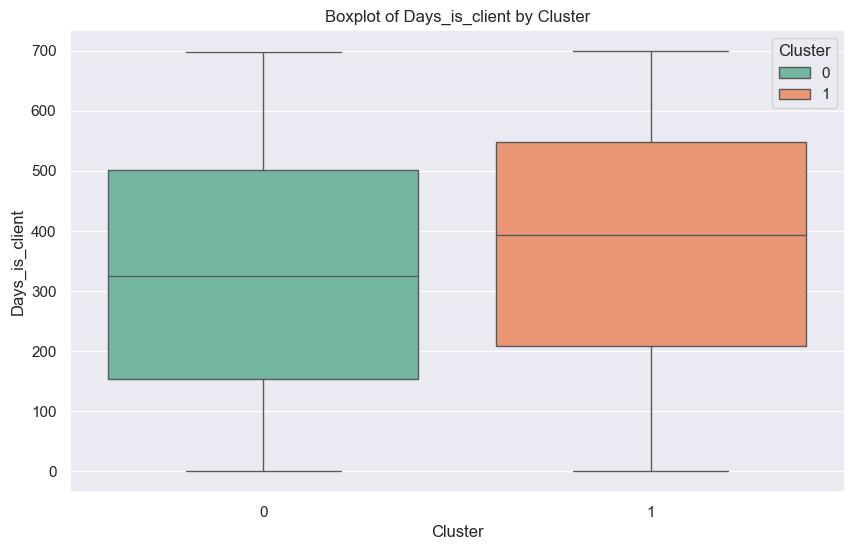

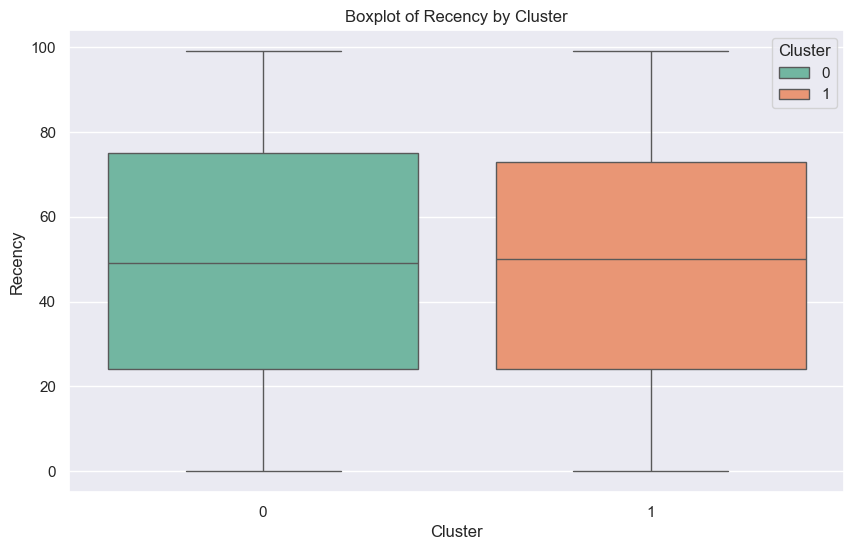

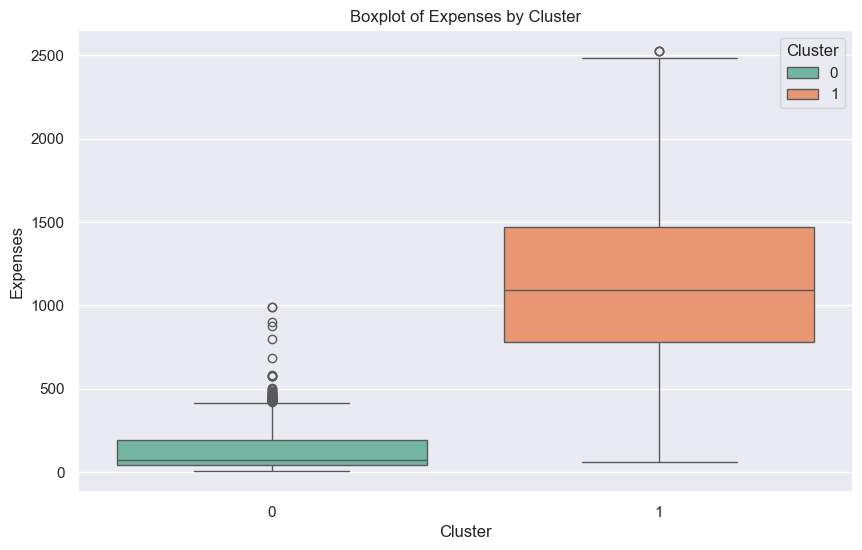

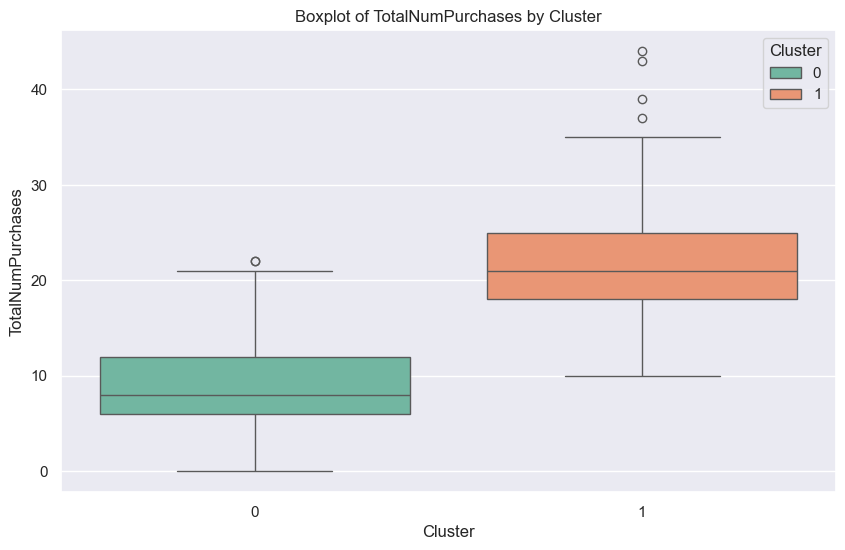

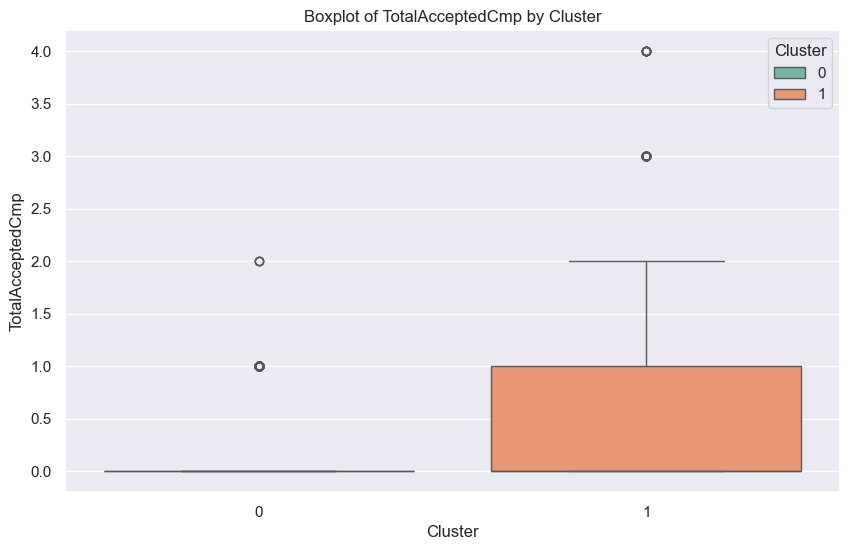

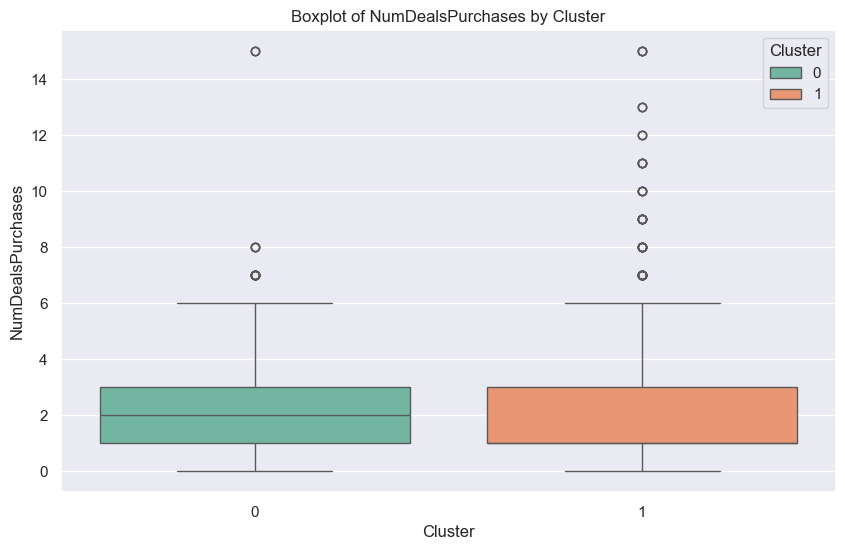

In [175]:
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters, hue='Cluster', palette='Set2') 
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

In [163]:
df_clusters['Kids'].value_counts()

Kids
1    1583
0     633
Name: count, dtype: int64

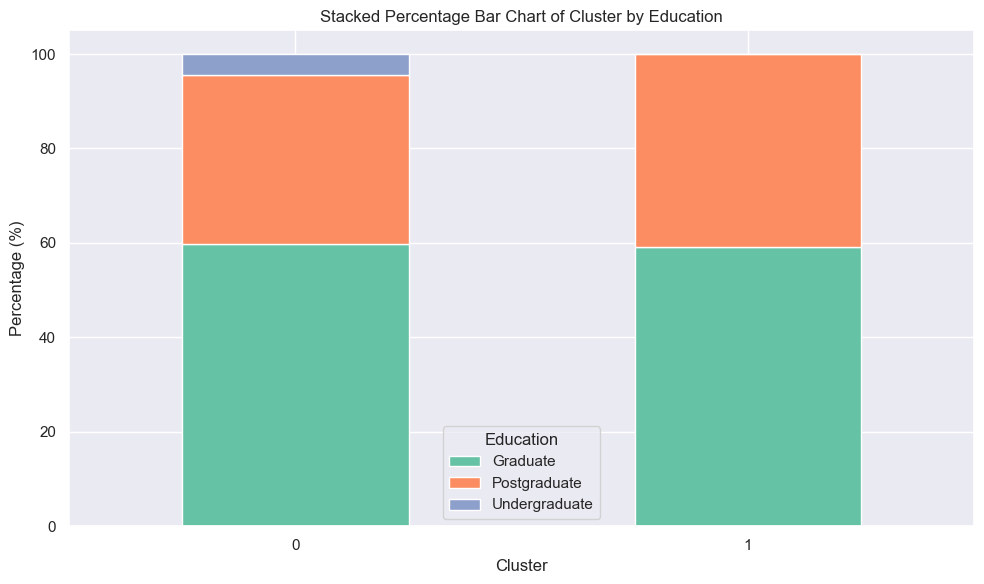

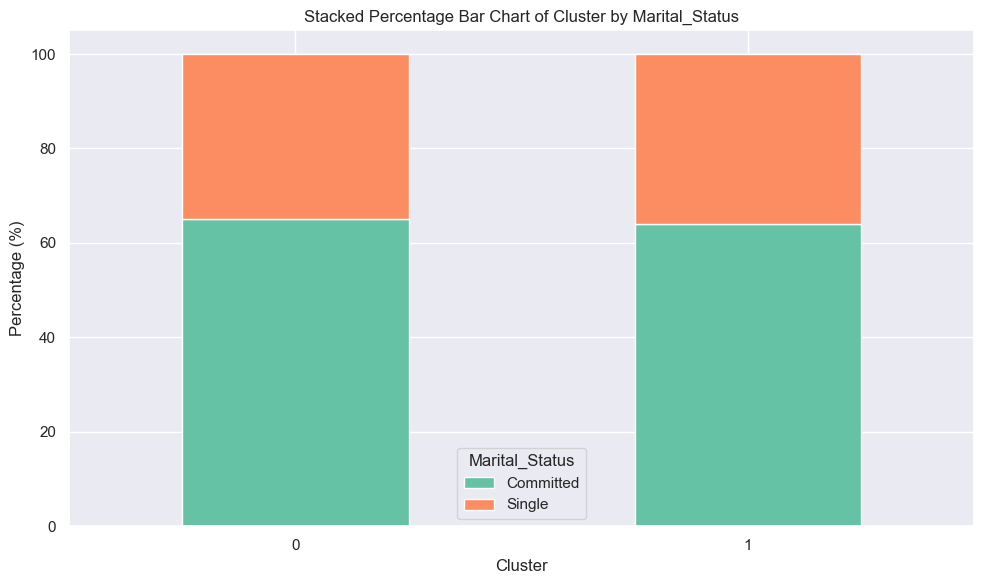

In [169]:
categorical_columns = ['Education', 'Marital_Status']
palette = sns.color_palette("Set2") 

for column in categorical_columns:
    # 计算每个簇内不同类别的计数
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # 计算百分比
    data_percentage = data.div(data.sum(axis=1), axis=0) * 100

    # 绘制百分比堆叠柱状图
    data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
    
    plt.title(f'Stacked Percentage Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage (%)')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout() 
    plt.show()

根据分析，划分出两类客户：
1. 第一类：高收入、高支出、相对年轻、热衷于网购、大学及以上文凭、购买次数多、多数有孩子、关注促销营销活动、成为客户相对较早；
2. 第二类：低收入、低支出、相对年长、网购较少、部分未上过大学、购买频次低、大部分没有青少年多儿女、对营销活动不敏感；